# Modelos discretos

## Modelo de Uniforme Discreto

In [ ]:
import random as random
import numpy as np
# inicializa o gerador de números aleatórios
np.random.seed(10)

n = 12 # número de faces do dado
dado = np.arange(1,n+1)
print('dado:', dado)
X = [] # armazena os valores
ns = 1000 # número de simulações
for i in range(0,ns):
    # sorteia uma face do dado
    x = random.choice(dado)
    X.append(x)
print('Média = ', np.mean(X)) # calcula a média
print('Variância = ', np.var(X)) # calcula a variância

dado: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Média =  6.556
Variância =  11.762864000000002


## Modelo de Bernoulli

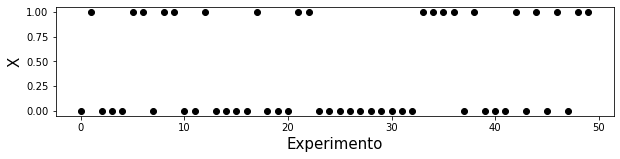

[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1]


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(10)

n = 50 # número de experimentos
S = [] # lista que armazena as saídas
p = 0.4 # probabilidade de sucesso
for t in range(0,n):
    # gera uma saída: 0 ou 1
    if(np.random.uniform() < p):
        s = 1 # ocorre um sucesso
    else:
        s = 0 # ocorre uma falha
    S.append(s)
# mostra os resultados
plt.figure(figsize=(10,2))
plt.plot(range(0,n), S, 'ko')
plt.xlabel('Experimento', fontsize = 15)
plt.ylabel('X',fontsize = 15)
plt.savefig('bernoulli.svg')
plt.show(True)
print(S)

## Modelo Binomial

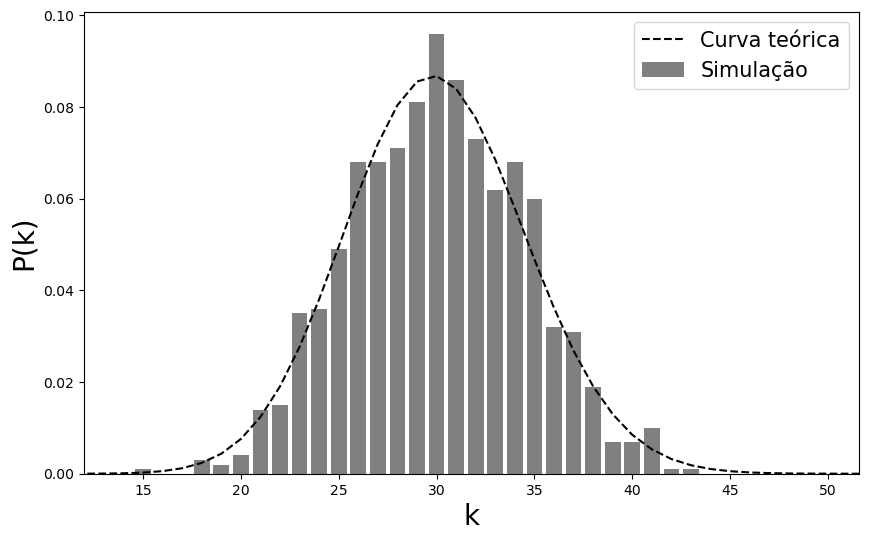

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import binom
import math
np.random.seed(42)

n = 100 # número de lançamentos
p = 0.3 # probabilidade de sair cara
Pk = np.zeros(n)
vk = np.arange(0,n)
ns = 1000 # número de simulações
# simula a distribuição binomial
for j in range(0,ns): # realiza ns simulações
    S = 0 # número de sucessos
    for i in range(0,n): # para n lançamentos
        if(np.random.uniform() <= p): # se sair um sucesso
            S = S + 1
    Pk[S] = Pk[S] + 1
Pk=Pk/sum(Pk) # normaliza a distribuição de probabilidade
# mostra os resultados da simulações
plt.figure(figsize=(10,6))
plt.xlim(0.8*np.min(vk[Pk>0]),1.2*np.max(vk[Pk>0]))
plt.bar(vk, Pk, color ='gray', label='Simulação')
# mostra a curva teorica
Pkt = np.zeros(n+1) # valores teóricos da probabilidade
vkt = np.arange(0,n+1) # variação em k
for k in range(0,n+1): # varia de 0 ate n
    C = (math.factorial(n)/(math.factorial(n-k)*math.factorial(k)))
    Pkt[k] = C*(p**k)*(1-p)**(n-k)
plt.plot(vkt, Pkt, color ='black', linestyle = 'dashed', label='Curva teórica')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('binomial.svg')
plt.show(True)

**Exemplo:** Em uma urna há 8 bolas brancas e 4 pretas. Retira-se 5 bolas com reposição.  Dentre essas cinco bolas retiradas, calcule a probabilidade de que saiam ao menos quatro bolas brancas.


In [ ]:
import random as random
urna = ['B','B','B','B','B','B','B','B','P','P','P','P']
n = 5
k = 4
ns = 100 # número de simulações
x = 0 # número de experimentos favoráveis
for s in range(0,ns):
    sucessos = 0
    for i in range(0,n):
        bola_retirada = random.choice(urna)
        if(bola_retirada == 'B'):
            sucessos = sucessos + 1
    if(sucessos >= k):
        x = x + 1
print("Probabilidade = ", x/ns)

Probabilidade =  0.47


## Modelo de Poisson

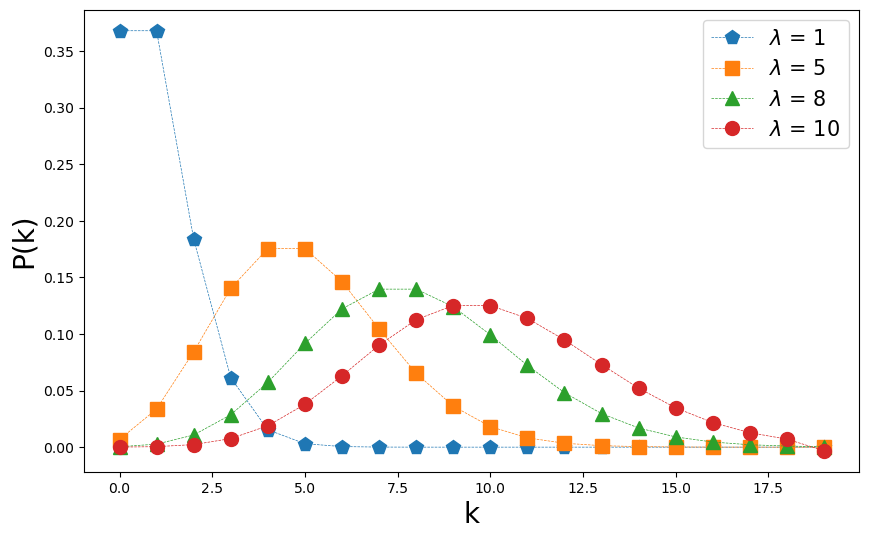

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
kmax = 20 # valor máximo de k
plt.figure(figsize=(10,6))
vlb = [1,5,8,10] # lambdas
markers = ["o", "^", "s", "p"] # símbolos no gráfico
for lbd in vlb:
    px = []
    for k in np.arange(0,kmax):
        px.append((np.exp(-lbd)*lbd**k)/math.factorial(k))
    plt.plot(np.arange(0,kmax), px, marker=markers.pop(), markersize=10,
             linewidth=0.5,linestyle='dashed',
             label=r'$\lambda$ = '+str(lbd))
    plt.xlabel('k', fontsize = 20)
    plt.ylabel('P(k)',fontsize = 20)
plt.legend(fontsize = 15)
plt.savefig('poisson.svg')
plt.show(True)

Lei dos eventos raros:

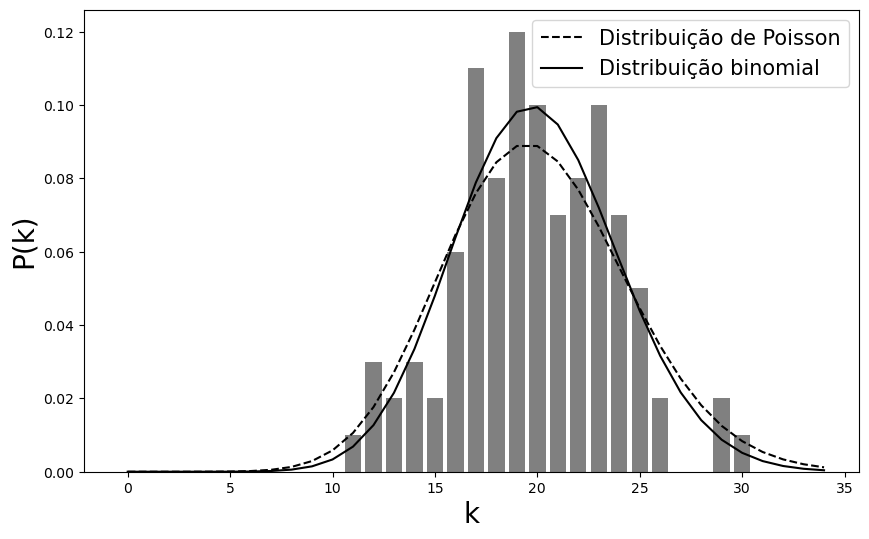

In [ ]:
import numpy as np
from scipy.stats import poisson, binom
from matplotlib import pyplot as plt
np.random.seed(101)

N = 100 # número de vértices
lbd = 20 # número médio de conexões
p = lbd/(N-1) # probabilidade de conectar dois vértices
# cria a matriz de adjacência
A = np.zeros((N,N))
for i in range(0,N):
    for j in range(i+1,N):
        if np.random.uniform() <= p:
            # conecta os vértices i e j
            A[i,j] = 1
            A[j,i] = 1
# lista com o número de conexões de cada vértice
vk = np.sum(A, axis = 0,dtype = np.uint8)
# armazena a distribuição de probabilidade
Pk = np.zeros(int(np.max(vk)+1))
for k in vk:
    Pk[k] = Pk[k]+1
Pk = Pk/np.sum(Pk)

# mostra a distribuição de probabilidade
plt.figure(figsize=(10,6))
plt.bar(np.arange(0,np.max(vk)+1), Pk, color = 'gray')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)

# Mostra a distribuição teórica de Poisson
x = np.arange(0,np.max(vk)+5)
px = poisson((N-1)*p)
plt.plot(x,px.pmf(x), '--', color ='black',
         label='Distribuição de Poisson')

# Mostra a distribuição teórica binomial
pb = binom((N-1),p)
plt.plot(x,pb.pmf(x), '-', color = 'black',
         label='Distribuição binomial')
plt.legend(fontsize = 15)
plt.savefig('poisson1.svg')
plt.show(True)

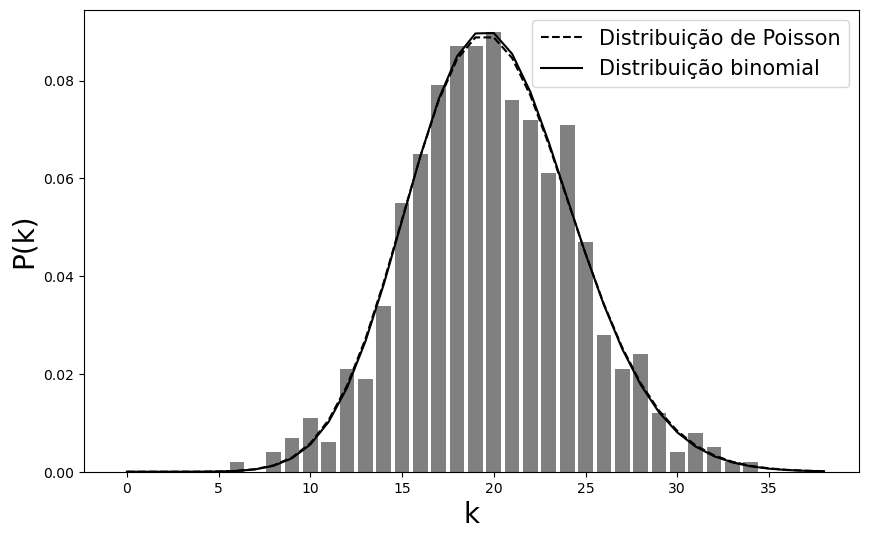

In [ ]:
import numpy as np
from scipy.stats import poisson, binom
from matplotlib import pyplot as plt
np.random.seed(101)

N = 1000 # número de vértices
lbd = 20 # valor esperado
p = lbd/(N-1) # probabilidade de conectar dois vértices
# cria a matriz de adjacência
A = np.zeros((N,N))
for i in range(0,N):
    for j in range(i+1,N):
        if np.random.uniform() <= p:
            A[i,j] = 1
            A[j,i] = 1
# lista com o número de conexões
vk= np.sum(A, axis = 0,dtype = np.uint8)
# armazena a distribuição de probabilidade
Pk = np.zeros(int(np.max(vk)+1))
for k in vk:
    Pk[k] = Pk[k]+1
Pk = Pk/np.sum(Pk)

# mostra a distribuição de probabilidade
plt.figure(figsize=(10,6))
plt.bar(np.arange(0,np.max(vk)+1), Pk, color = 'gray')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)

# Mostra a distribuição teórica de Poisson
x = np.arange(0,np.max(vk)+5)
px = poisson((N-1)*p)
plt.plot(x,px.pmf(x), '--', color ='black', label='Distribuição de Poisson')

# Mostra a distribuição teórica binomial
pb = binom((N-1),p)
plt.plot(x,pb.pmf(x), '-', color = 'black', label='Distribuição binomial')
plt.legend(fontsize = 15)
plt.savefig('poisson2.svg')
plt.show(True)

**Exemplo:** Nos Estados Unidos, ocorrem, em média, sete ataques de tubarão por ano.  Em um ano qualquer, qual é a probabilidade que ocorram ao menos 5 ataques?

In [ ]:
import numpy as np
import math as math

lbd = 7
k = 5

def Poisson(k,lbd):
    p = (np.exp(-lbd)*lbd**k)/math.factorial(k)
    return p

prob = 0
for k in range(0,5):
    prob = prob +  Poisson(k,lbd)

print("P(X >= 5) = ",1 - prob)

P(X >= 5) =  0.8270083921179286


## Distribuição geométrica

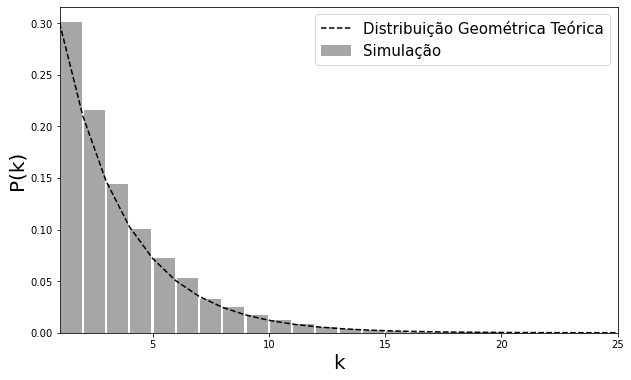

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import geom
np.random.seed(10)

p = 0.3 # probabilidade de um sucesso
X = [] # Armazena o número de experimentos
ns = 10000 # número de simulações
for i in range(0,ns):# para ns simulações
    k = 0 # número de experimentos
    s = False # variável que indica uma falha
    while s == False: # enquanto não sair um sucesso
        r = np.random.uniform() # sorteia um numero entre 0 e 1
        if(r <= p): # se for um sucesso
            s = True # indica um sucesso
        k = k + 1 # incrementa o número de experimentos
    X.append(k) # guarda o número de experimentos

k = np.arange(0, np.max(X))
# mostra os resultados da simulação
plt.figure(figsize=(10,6))
count, bins, ignored = plt.hist(X, bins=k, density=True,
                                color='gray',alpha=0.7,
                                rwidth=0.9, label='Simulação')
plt.xlabel('k', fontsize = 20)
plt.ylabel('P(k)',fontsize = 20)

# mostra a distribuicao teórica
x = np.arange(1,np.max(k)+5)
px = geom(p)
plt.plot(x,px.pmf(x), '--', color ='black',
         label='Distribuição Geométrica Teórica')
plt.xlim(1,max(x))
plt.legend(fontsize =15)
plt.savefig('geometric.svg')
plt.show(True)

**Exemplo:** Imagine que temos uma urna com 36 bolas, sendo 27 bolas brancas e 9 pretas.  Bolas são retiradas até que uma bola preta apareça.  Qual é a probabilidade de que precisaremos de mais de seis retiradas para sortear a primeira bola preta?


In [ ]:
import numpy as np
np.random.seed(10)
p = 9/36
ns = 1000 # número de simulações
X = 0 # número de experimentos favoráveis
for s in range(0,ns):
    k = 0 # número de retiradas
    sucesso = False
    # enquanto não sair a bola preta, faça
    while sucesso == False:
        if(np.random.uniform() < p):
            sucesso = True
        k = k + 1
    if(k > 6):
        # se foi necessária mais do que 6 retiradas
        X = X + 1
print('P(X > 6) = ', X/ns)

P(X > 6) =  0.165


**Exemplo:** Em uma cidade,  4\% das pessoas são professores.  Qual é a probabilidade de que a décima pessoa que encontramos na rua, de forma aleatória, seja o primeiro professor? Qual o número médio de pessoas que devemos consultar para encontrar um professor?


In [ ]:
import numpy as np
np.random.seed(13)
p = 0.04
ns = 10000 # número de simulações
X = [] # número de encontros necessários
for s in range(0,ns):
    k = 0 # número de encontros
    sucesso = False
    # enquanto não encontrar um professor
    while sucesso == False:
        if(np.random.uniform() < p):
            sucesso = True
        k = k + 1
    # guarda o número de encontros
    X.append(k)
print('Número médio de encontros = ', np.mean(X))
print('Variância = ', np.var(X))

Número médio de encontros =  24.8473
Variância =  599.17678271


In [ ]:
import numpy as np
np.random.seed(100)
p = 0.04
ns = 1000 # número de simulações
X = [] # número de encontros necessários
for s in range(0,ns):
    nr = 0 # número de encontros
    sucesso = 0
    # enquanto não encontrar um professor
    while sucesso == 0:
        if(np.random.uniform() < p):
            sucesso = 1
        nr = nr + 1
    # guarda o número de encontros
    X.append(nr)
print('Número médio de encontros = ', np.mean(X))
print('Variância = ', np.var(X))(1 - p)/(p**2)

600.0

## Distribuição binomial negativa

**Exemplo:** Um aplicativo de celular é considerado adequado quando não falha em ao menos 3 testes. Sejam $p = 0,7$ a probabilidade do aplicativo não travar durante o teste.  Calcule a probabilidade de que o aplicativo será aceito após cinco testes.


In [ ]:
import math as math

p = 0.7
p = math.factorial(4)/(math.factorial(4-2)*math.factorial(2))*(p**2)*((1-p)**(4-2))*p
print("P(X = 5) = ",p)

P(X = 5) =  0.18522


In [ ]:
import numpy as np
np.random.seed(10)

p = 0.7 # probabilidade de um sucesso
k = 0 # número de experimentos
r = 3 # número de sucessos para aceitar o app
ns = 1000 # número de simulações
x = 0 # número de experimentos favoráveis
for s in range(0,ns):
    sucessos = 0
    k = 0 # número de testes para termos 3 sucessos
    while sucessos < 3:
        if(np.random.uniform() < p):
            sucessos = sucessos + 1
        k = k + 1
    # se ocorrem 3 sucessos em 5 tentativas,
    # sendo a última um sucesso, incrementa x
    if(k == 5):
        x = x + 1
print("P(X = 5) =",x/ns)

P(X = 5) = 0.18


## Distribuição hipergeométrica

**Exemplo:** Em uma fábrica de sucos, garrafas de um litro são embaladas em caixas de 25 unidades.  Para aceitar esse lote,  o funcionário de uma loja sorteia cinco garrafas e mede a quantidade de líquido que cada garrafa contém. Se dentre as cinco garrafas sorteadas,no máximo duas apresentarem menos de um litro de suco, o lote é aceito.  Sabendo que um lote tem quatro garrafas com menos de um litro de suco, qual é a probabilidade da caixa ser aceita?

Para gerarmos dados com uma distribuição hipergeométrica, podemos usar a biblioteca Numpy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 25 # número total de elementos
N1 = 4 # número de elementos do tipo 1
N2 = N-N1 # número de elementos do tipo 2
r = 5 # número de objetos selecionados sem reposição
n = 1000 # número de simulações
X = np.random.hypergeometric(N2, N1, r, n)
# contamos quantos experimentos tivemos no máximo dois objetos do tipo I
prob = 1 - len(X[X <=2])/n
print('Probabilidade = ',prob)

Probabilidade =  0.984


Podemos usar também o código a seguir:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
random.seed(10)

N = 25 # número total de elementos
N1 = 4 # número de elementos do tipo 1
N2 = N-N1 # número de elementos do tipo 2
n = 5 # número de objetos selecionados sem reposição
# geramos um vetor com os itens dos tipos 1 e 2
v = [1]*N1 + [2]*N2
# simulamos s retiradas
s = 100 # número de simulações
k = 0 # conta os sucessos
x = 2 # número de objetivos do tipo 1 sorteados
for i in range(0,s):
    # sorteia n itens sem reposição
    itens = random.sample(v,n)
    if(itens.count(1) <= x):
        k = k + 1
print("Probabilidade = ", k/s)

Probabilidade =  0.97


Podemos ainda calcular o valor esperado:

Valor esperado Teórico: 3.36
Valor esperado pela simulação: 4.196


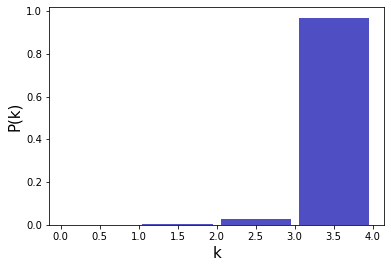

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 25
N1 = 4 # número de elementos do tipo 1
N2 = N-N1 # número de elementos do tipo 2
r = 5 # número de objetos selecionados sem reposicao
n = 1000 # número de simulações
X = np.random.hypergeometric(N2, N1, r, 1000)
k = np.arange(0, np.max(X))
print("Valor esperado Teórico:", N2*N1/(N1+N2))
print("Valor esperado pela simulação:", np.sum(X)/len(X))

count, bins, ignored = plt.hist(X, bins=k, density=True, color='#0504aa',alpha=0.7,
                                rwidth=0.9)
plt.xlabel('k', fontsize = 15)
plt.ylabel('P(k)',fontsize = 15)
plt.show(True)

**Exemplo:** Considere uma urna com 7 bolas pretas, 5 bolas vermelhas e 8 bolas brancas. <br>

a) Se cinco bolas são retiradas com reposição, qual é a probabilidade de sortearmos 2 bolas brancas?

In [ ]:
import numpy as np
import math as math

def C(n,k):
    c = math.factorial(n)/(math.factorial(n-k)*math.factorial(k))
    return c

n = 5
k = 2
p = 8/20
prob = C(n,k)*(p**k)*(1-p)**(n-k)
print("P(X=2)=",prob)

P(X=2)= 0.3456


b) Se cinco bolas são retiradas sem reposição, qual é a probabilidade de sortearmos 2 bolas brancas?

In [ ]:
prob = C(8,2)*C(12,3)/C(20,5)
print("P(X=2)=",prob)

P(X=2)= 0.3973168214654283


c) Qual é a probabilidade de que a 4 bola retirada seja a primeira vermelha?

In [ ]:
p = 5/20
k = 3
prob = ((1-p)**(k-1))*p
print("P(X=4)=",prob)

P(X=4)= 0.140625


d) Qual é a probabilidade de que vamos precisa de 8 lançamentos para obtermos cinco bolas pretas, sendo a oitava bola uma bola preta?

In [ ]:
p = 7/20
prob = (C(7,4)*(p**4)*(1-p)**(7-4))*p
print("P(X=8)=",prob)

P(X=8)= 0.05048336972656249


e) Se escolhermos seis bolas, qual é a chance de sortearmos duas bolas brancas,  três pretas e uma vermelha?

In [ ]:
prob = math.factorial(6)/(math.factorial(2)*math.factorial(2)*math.factorial(1))*((8/20)**2)*((7/20)**3)*((5/20)**1)
print("Probabilidade=",prob)

Probabilidade= 0.3087
